(600.0, 3600.0)

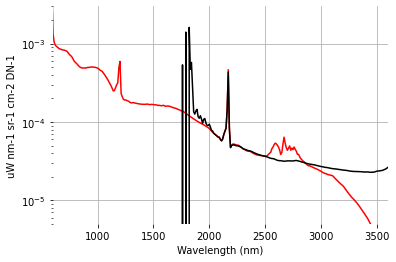

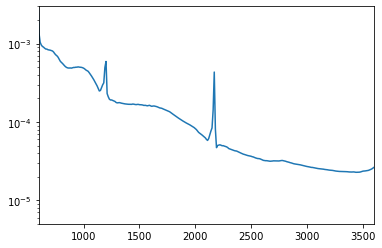

In [49]:
# David R Thompson
import numpy as np
import pylab as plt
from scipy.interpolate import interp1d

c,rcc_227ms_swir,u = np.loadtxt('../data/HVM3_RadiometricCoeffs227msSWIR_20221028.txt').T
c,rcc_44ms_swir,u = np.loadtxt('../data/HVM3_RadiometricCoeffs44msSWIR_20221028.txt').T
wl,rdn_swir = np.loadtxt('swir_radiance.txt').T


c,rcc_44ms_mwir_a,u = np.loadtxt('../data/MWIRCal/HVM3_RadiometricCoeffs_44ms_BB325_LR_MWIR.txt').T
c,rcc_44ms_mwir_b,u = np.loadtxt('../data/MWIRCal/HVM3_RadiometricCoeffs_44ms_BB325_RL_MWIR.txt').T
c,rcc_44ms_mwir_c,u = np.loadtxt('../data/MWIRCal/HVM3_RadiometricCoeffs_44ms_BB350_LR_MWIR.txt').T
c,rcc_44ms_mwir_d,u = np.loadtxt('../data/MWIRCal/HVM3_RadiometricCoeffs_44ms_BB350_RL_MWIR.txt').T
c,rcc_44ms_mwir_e,u = np.loadtxt('../data/MWIRCal/HVM3_RadiometricCoeffs_44ms_BB400_LR_MWIR.txt').T
c,rcc_44ms_mwir_f,u = np.loadtxt('../data/MWIRCal/HVM3_RadiometricCoeffs_44ms_BB400_RL_MWIR.txt').T
rcc_44ms_mwir = np.median(np.array([rcc_44ms_mwir_c,rcc_44ms_mwir_d]),axis=0)
#rcc_44ms_mwir = np.median(np.array([rcc_44ms_mwir_e,rcc_44ms_mwir_f]),axis=0)
#rcc_44ms_mwir = np.median(np.array([rcc_44ms_mwir_f,rcc_44ms_mwir_e,rcc_44ms_mwir_c,rcc_44ms_mwir_d,rcc_44ms_mwir_a,rcc_44ms_mwir_b]),axis=0)
plt.semilogy(wl,rcc_44ms_swir,'r')
plt.semilogy(wl,rcc_44ms_mwir,'k')
#plt.plot(wl,rcc_44ms_mwir_a)
#plt.plot(wl,rcc_44ms_mwir_d)
#plt.plot(wl,rcc_44ms_mwir_c)
#plt.plot(wl,rcc_44ms_mwir_b)
#plt.plot(wl,rcc_44ms_mwir_f)
#plt.plot(wl,rcc_44ms_mwir_e)
plt.ylim([0.000005,0.003])
plt.xlim([600,3600])
plt.box(False)
plt.grid(True)
plt.xlabel('Wavelength (nm)')
plt.ylabel('uW nm-1 sr-1 cm-2 DN-1')
plt.savefig('RCC_overlap_44ms.pdf')

overlap = np.argmin(abs(wl-2150))
rcc_44ms = np.concatenate((rcc_44ms_mwir[:overlap],rcc_44ms_swir[overlap:]),axis=0)

#plt.semilogy(wl,rcc_44ms,'k',lw=2)

plt.figure()
plt.semilogy(wl,rcc_44ms)
np.savetxt('../data/HVM3_RadiometricCoeffs_44ms_20221118.txt',
          np.c_[np.arange(len(wl)),rcc_44ms,np.zeros(len(wl))])
plt.ylim([0.000005,0.003])
plt.xlim([600,3600])

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102]
102


(1e-06, 2e-05)

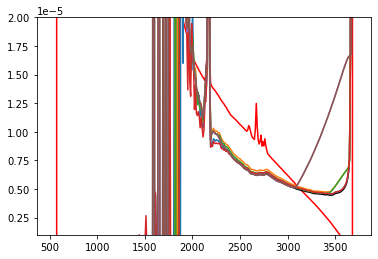

In [50]:
# David R Thompson
import numpy as np
import pylab as plt
from scipy.interpolate import interp1d

c,rcc_227ms_swir,u = np.loadtxt('../data/HVM3_RadiometricCoeffs_227ms_SWIR_20221028.txt').T
wl,rdn_swir = np.loadtxt('swir_radiance.txt').T


c,rcc_227ms_mwir_a,u = np.loadtxt('../data/MWIRCal/HVM3_RadiometricCoeffs_227ms_BB300_LR_MWIR.txt').T
c,rcc_227ms_mwir_b,u = np.loadtxt('../data/MWIRCal/HVM3_RadiometricCoeffs_227ms_BB300_RL_MWIR.txt').T
c,rcc_227ms_mwir_c,u = np.loadtxt('../data/MWIRCal/HVM3_RadiometricCoeffs_227ms_BB325_LR_MWIR.txt').T
c,rcc_227ms_mwir_d,u = np.loadtxt('../data/MWIRCal/HVM3_RadiometricCoeffs_227ms_BB325_RL_MWIR.txt').T
c,rcc_227ms_mwir_e,u = np.loadtxt('../data/MWIRCal/HVM3_RadiometricCoeffs_227ms_BB350_LR_MWIR.txt').T
c,rcc_227ms_mwir_f,u = np.loadtxt('../data/MWIRCal/HVM3_RadiometricCoeffs_227ms_BB350_RL_MWIR.txt').T
rcc_227ms_mwir = np.median(np.array([rcc_227ms_mwir_e,rcc_227ms_mwir_f]),axis=0)
#rcc_227ms_mwir = np.median(np.array([rcc_227ms_mwir_d,rcc_227ms_mwir_c]),axis=0)
saturated = np.where(wl>2700)[0]
print(saturated)
ref = saturated[-1]
print(ref)
rcc_227ms_mwir[saturated] = rcc_227ms_mwir_b[saturated] * rcc_227ms_mwir[ref] / rcc_227ms_mwir_b[ref]

plt.plot(wl,rcc_227ms_swir,'r')
plt.plot(wl,rcc_227ms_mwir,'k')
plt.plot(wl,rcc_227ms_mwir_a)
plt.plot(wl,rcc_227ms_mwir_d)
plt.plot(wl,rcc_227ms_mwir_c)
plt.plot(wl,rcc_227ms_mwir_b)
plt.plot(wl,rcc_227ms_mwir_f)
plt.plot(wl,rcc_227ms_mwir_e)
plt.ylim([0.000001,0.00002])

/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


(0.15, 0.5)

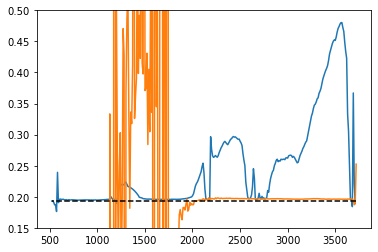

In [51]:
# Fix problematic SWIR calibration

plt.plot(wl,rcc_227ms_swir/rcc_44ms_swir)
plt.plot(wl,rcc_227ms_mwir/rcc_44ms_mwir)
plt.plot(wl,np.ones_like(wl)*44/227.0,'k--')
ratio = rcc_227ms_mwir / rcc_44ms_mwir
ratio = np.median(ratio[np.logical_and(wl>2400,wl<3000)])
rcc_227ms_swir = rcc_44ms_swir * ratio
plt.ylim([0.15,0.5])


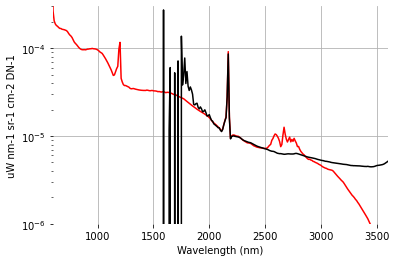

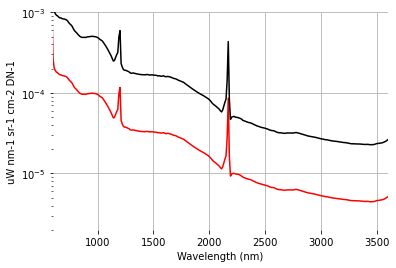

In [52]:

plt.semilogy(wl,rcc_227ms_swir,'r')
plt.semilogy(wl,rcc_227ms_mwir,'k')
plt.ylim([0.000001,0.0003])
plt.xlim([600,3600])
plt.box(False)
plt.grid(True)
plt.xlabel('Wavelength (nm)')
plt.ylabel('uW nm-1 sr-1 cm-2 DN-1')
plt.savefig('RCC_overlap_227ms.pdf')

overlap = np.argmin(abs(wl-2150))
rcc_227ms = np.concatenate((rcc_227ms_mwir[:overlap],rcc_227ms_swir[overlap:]),axis=0)

#plt.semilogy(wl,rcc_227ms,'k',lw=2)
plt.figure()
plt.semilogy(wl,rcc_227ms,'r')
plt.semilogy(wl,rcc_44ms,'k')
np.savetxt('../data/HVM3_RadiometricCoeffs_227ms_20221118.txt',
          np.c_[np.arange(len(wl)),rcc_227ms,np.zeros(len(wl))])
plt.ylim([0.000002,0.001])
plt.xlim([600,3600])
plt.box(False)
plt.grid(True)
plt.xlabel('Wavelength (nm)')
plt.ylabel('uW nm-1 sr-1 cm-2 DN-1')

plt.savefig('RCC_overlap_final.pdf')

(600.0, 3600.0)

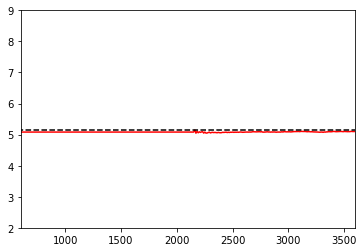

In [53]:
plt.plot(wl,rcc_44ms/rcc_227ms,'r')
plt.ylim([2,9])
plt.plot(wl,np.ones_like(wl)*(227.0/44.0),'k--')
plt.xlim([600,3600])

In [35]:
5.04/4

1.26

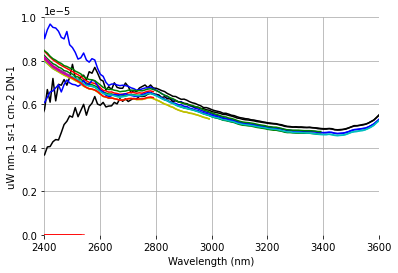

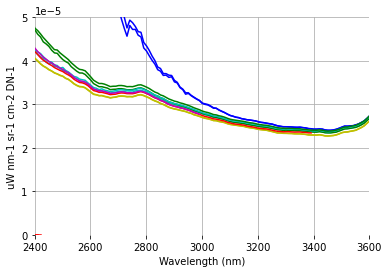

In [78]:
import numpy as np
import pylab as plt
wl,rdn_swir = np.loadtxt('swir_radiance.txt').T

for direction in ['LR','RL']:
    for color,temp in [('r','200'),('k','250'),('b','275'),('c','300'),
                       ('g','325'),('y','350'),('r','375'),('m','400')]:
    #for color,temp in [('g','282'),('b','275'),('m','290'),('k','250'),('c','300')]:
        fil = '../data/MWIRCal/HVM3_RadiometricCoeffs_227ms_BB%s_%s_MWIR.txt'%(temp,direction)
        c,rcc,u = np.loadtxt(fil).T
        rcc[rcc<0] = np.nan
        
        if temp=='400':
            rcc[wl>2500] = np.nan
        if temp=='375':
            rcc[wl>2800] = np.nan
        if temp=='350':
            rcc[wl>3000] = np.nan
        if temp=='325':
            rcc[wl>3400] = np.nan
        plt.plot(wl,rcc,color)
#plt.ylim([0.000004,0.00001])
plt.ylim([0,0.00001])
plt.xlim([2400,3600])
plt.grid(True)
plt.box(False)
plt.xlabel('Wavelength (nm)')
plt.ylabel('uW nm-1 sr-1 cm-2 DN-1')
plt.savefig('RCC_temps_227ms.pdf')

plt.figure()
for direction in ['LR','RL']:
    
    for color,temp in [('r','200'),('k','250'),('b','275'),('c','300'),
                       ('g','325'),('y','350'),('r','375'),('m','400')]:
    #for color,temp in [('r','350'),('m','300'),('b','325'),('g','375'),('k','400')]:
        fil = '../data/MWIRCal/HVM3_RadiometricCoeffs_44ms_BB%s_%s_MWIR.txt'%(temp,direction)
        c,rcc,u = np.loadtxt(fil).T
        rcc[rcc<0] = np.nan
        if temp=='375' and direction=='LR':
            continue
        if temp=='400' and direction=='LR':
            continue
        if temp=='250' and direction=='LR':
            continue
        if temp=='400':
            rcc[wl>3000] = np.nan
        if temp=='375':
            rcc[wl>3400] = np.nan
        plt.plot(wl,rcc,color)
        
            
#plt.ylim([0.00002,0.00005])
plt.ylim([0.00000,0.00005])
plt.xlim([2400,3600])
plt.grid(True)
plt.box(False)
plt.xlabel('Wavelength (nm)')
plt.ylabel('uW nm-1 sr-1 cm-2 DN-1')
plt.savefig('RCC_temps_44ms.pdf')

/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Users/

(2500.0, 3600.0)

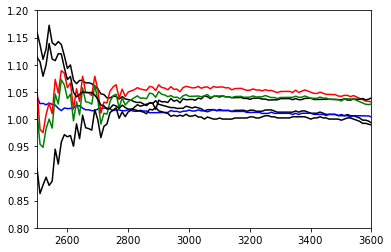

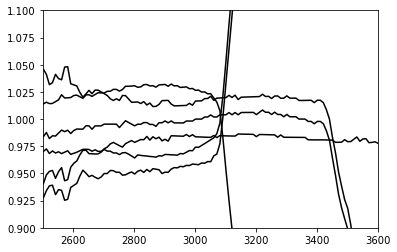

In [75]:
plt.figure()
c,rcc4,u = np.loadtxt('../data/MWIRCal/HVM3_RadiometricCoeffs_227ms_BB250_LR_MWIR.txt').T
c,rcc3,u = np.loadtxt('../data/MWIRCal/HVM3_RadiometricCoeffs_227ms_BB282_LR_MWIR.txt').T
c,rcc2,u = np.loadtxt('../data/MWIRCal/HVM3_RadiometricCoeffs_227ms_BB275_LR_MWIR.txt').T
c,rcc1,u = np.loadtxt('../data/MWIRCal/HVM3_RadiometricCoeffs_227ms_BB290_LR_MWIR.txt').T
plt.plot(wl,rcc2/rcc3,'k')
plt.plot(wl,rcc1/rcc3,'b')
plt.plot(wl,rcc4/rcc3,'r')
plt.plot(wl,rcc4/rcc2,'k')
plt.plot(wl,rcc4/rcc1,'g')
plt.plot(wl,rcc2/rcc1,'k')
plt.ylim([0.8,1.2])
plt.xlim([2500,3600])

plt.figure()
c,rcc4,u = np.loadtxt('../data/MWIRCal/HVM3_RadiometricCoeffs_227ms_BB300_LR_MWIR.txt').T
c,rcc3,u = np.loadtxt('../data/MWIRCal/HVM3_RadiometricCoeffs_227ms_BB325_LR_MWIR.txt').T
c,rcc2,u = np.loadtxt('../data/MWIRCal/HVM3_RadiometricCoeffs_227ms_BB350_LR_MWIR.txt').T
c,rcc1,u = np.loadtxt('../data/MWIRCal/HVM3_RadiometricCoeffs_227ms_BB290_LR_MWIR.txt').T
plt.plot(wl,rcc2/rcc3,'k')
plt.plot(wl,rcc1/rcc3,'k')
plt.plot(wl,rcc4/rcc3,'k')
plt.plot(wl,rcc4/rcc2,'k')
plt.plot(wl,rcc4/rcc1,'k')
plt.plot(wl,rcc2/rcc1,'k')
plt.ylim([0.9,1.1])
plt.xlim([2500,3600])

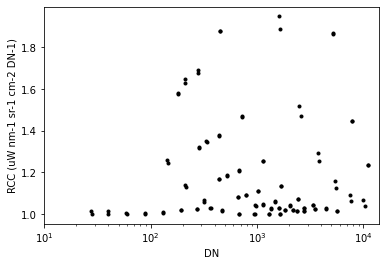

In [76]:
from glob import glob
import pylab as plt
import numpy as np

for color,ref_wl in [('k',q) for q in range(20,100,10)]:#('m',80),('g',90),('r',15),('k',30),('y',120),('b',110),('c',50)]:
    #plt.figure()
    dns,rccs,rdns,photons = [],[],[],[]
    for u,T in [('y',285),('g',282),('k',290),('r',300),('m',325),('b',350),('c',275),('b',250)]:
    
        for infil in sorted(glob('../data/MWIRCal/HVM3_DN2RDN_*%i*txt'%T)):
            wl,selfemiss,scene,rdn = np.loadtxt(infil).T
            scene = scene+5
            for i in [ref_wl]:
                if not np.isfinite(scene[i]) or (scene[i]<1e-9) or (scene[ref_wl]+selfemiss[ref_wl])>14000:
                    continue
                dns.append(scene[i])
                #dns.append(scene[i]+selfemiss[i])
                rccs.append(rdn[i]/scene[i])
                rdns.append(rdn[i])
                photons.append(rdn[i]*wl[i])
    rccs = np.array(rccs)
    if len(rccs)<2:
        continue
    plt.semilogx(dns,rccs/min(rccs),color+'.')
    #plt.semilogx(dns,rccs,color+'.')
    #plt.ylim([min(photons)*0.5,max(photons)*1.1])
    #plt.ylim([0.9,1.5])
    plt.xlim([10,14000])
    #plt.title('Reference wavelength %8.6f'%wl[ref_wl])
    plt.xlabel('DN')
    plt.ylabel('RCC (uW nm-1 sr-1 cm-2 DN-1)')